In [7]:
import os
from array import array
import numpy as np
from commpy.filters import rcosfilter
from commpy.filters import rrcosfilter
import matplotlib
import matplotlib.pyplot as plt
import ipympl
#%matplotlib inline
%matplotlib widget

In [8]:
def calculate_spectrum(signal):
    yf = np.fft.fft(signal)
    yf = np.abs(yf.reshape((len(yf), 1))) / len(signal)
    return yf


def plot_spectrum(signal, figure_counter, title="Amplitude spectrum"):
    spectrum = np.roll(calculate_spectrum(signal), len(signal) // 2)
    yf = 20 * np.log10(spectrum)

    plt.figure(figure_counter)
    plt.cla()
    x_data = np.arange(-len(spectrum) // 2 + 1, len(spectrum) // 2 + 1)
    x_data = x_data / (len(spectrum) / 2)
    plt.plot(x_data, yf)
    plt.grid(1)
    plt.xlabel('Frequency (semicircles)')
    plt.ylabel('Magnitude (dB)')
    plt.title(title)
    plt.show()
    return yf

def add_freq(sig, f0_to_fsig):
    n = np.arange(0, len(sig), 1)
    mixer = np.exp(1j * np.pi * f0_to_fsig * n)
    print(mixer[(821500 - 10 -1) : (821500 - 1)])
    return sig * mixer

In [11]:
def gen_rrc_filter_impulse_response(n, f_sampl, t_symb, roll_off=0.24):
    print(t_symb)
    s_psf = rrcosfilter(n * f_sampl, roll_off, Ts=t_symb, Fs=f_sampl)[1][1:]
    print(s_psf)
    #plt.figure()
    #plt.plot(s_psf, '*-')
    #plt.grid()
    #plt.title('RC filter impulse response')
    #plt.show()
    return s_psf

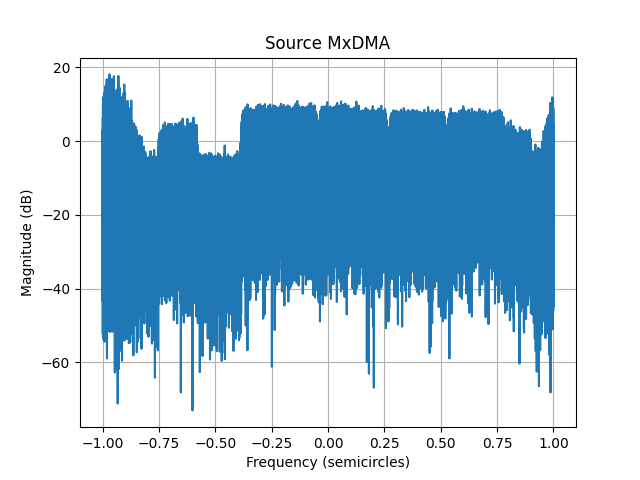

array([[-15.7342997 ],
       [-21.11758474],
       [-12.89300799],
       ...,
       [-14.67277518],
       [-17.0854427 ],
       [-11.25461173]])

In [12]:


def read_signal(file_name, data_type):
    file_stats = os.stat(file_name)
    file_size = file_stats.st_size
    iq_size_in_bytes = 4
    number_of_int_to_read = file_size // iq_size_in_bytes * 2
    arr = array(data_type)
    with open(file_path, 'rb') as fileobj:
        arr.fromfile(fileobj, number_of_int_to_read)
    i = np.array(arr[:: 2])
    i = i.reshape((len(i), 1))
    q = np.array(arr[1:: 2])
    q = q.reshape((len(q), 1))
    sig = np.empty((len(i), 1), complex)
    sig.real = i
    sig.imag = q
    sig_flatten = sig.flatten()
    return sig_flatten

file_path = "/home/xy/Signals/MxDMA/HRC/sig_1264460229_16437329_2024-06-14_14-48-43.pcm"
data_type = 'h'
figure_counter = 0
source_signal_full = read_signal(file_path, data_type)
start_pos = 75177 # [IQ-samples]
used_len = 1638400 #16437329 # [IQ-samples]
source_signal = source_signal_full[int(start_pos):int(start_pos + used_len)]
plot_spectrum(source_signal, 1, "Source MxDMA")

In [20]:
# RRC filtering
sig_board = 0.168
N = 129
Fs = 1
T_symb = 1 / sig_board
s_rrc = gen_rrc_filter_impulse_response(N, Fs, T_symb, 0.05)
print(s_rrc)

5.952380952380952
[ 1.10054321e-02  1.93091595e-02  2.24701469e-02  1.92910347e-02
  1.03448594e-02 -2.09508636e-03 -1.46203222e-02 -2.36103893e-02
 -2.62670489e-02 -2.14673431e-02 -1.01800697e-02  4.69778601e-03
  1.90690647e-02  2.87503266e-02  3.06726549e-02  2.38292329e-02
  9.68355854e-03 -8.10906164e-03 -2.46256728e-02 -3.50174103e-02
 -3.59085175e-02 -2.64555107e-02 -8.74359178e-03  1.26322667e-02
  3.17307215e-02  4.28849565e-02  4.23467984e-02  2.94869067e-02
  7.18130146e-03 -1.87777367e-02 -4.11422389e-02 -5.31833171e-02
 -5.06545098e-02 -3.31867950e-02 -4.68122536e-03  2.74825623e-02
  5.42840970e-02  6.75057077e-02  6.21410560e-02  3.80907704e-02
  6.15149746e-04 -4.06821160e-02 -7.41776446e-02 -8.93263870e-02
 -7.97469322e-02 -4.54468262e-02  6.49675832e-03  6.31286184e-02
  1.08536893e-01  1.27894482e-01  1.11668275e-01  5.89225984e-02
 -2.12121075e-02 -1.10444764e-01 -1.84592293e-01 -2.18618327e-01
 -1.92378028e-01 -9.57669926e-02  6.79642373e-02  2.81605967e-01
  5.163

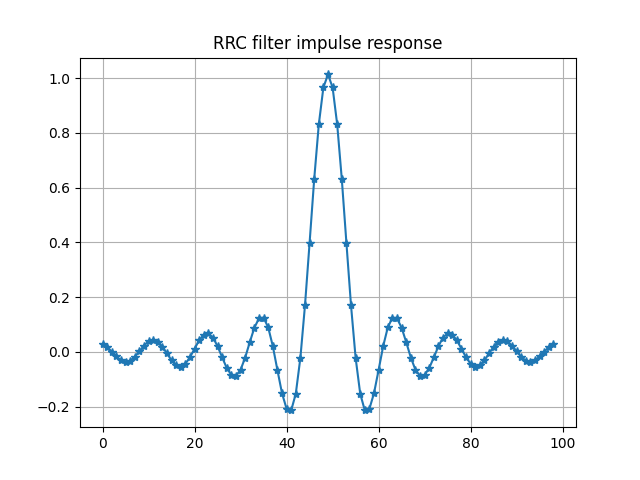

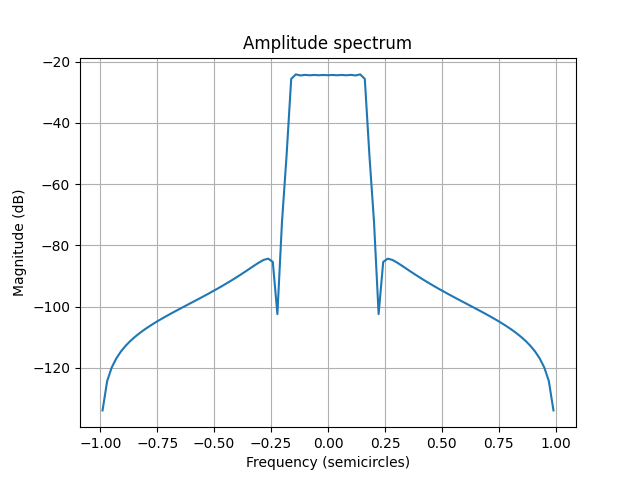

array([[-133.83705564],
       [-124.27975141],
       [-119.81298233],
       [-116.84564063],
       [-114.6028747 ],
       [-112.78475283],
       [-111.24319424],
       [-109.89403852],
       [-108.68476761],
       [-107.58032396],
       [-106.55606803],
       [-105.59395308],
       [-104.68029921],
       [-103.80442486],
       [-102.95776645],
       [-102.13329008],
       [-101.32508518],
       [-100.52807544],
       [ -99.73780773],
       [ -98.95029426],
       [ -98.16189201],
       [ -97.36920947],
       [ -96.56903408],
       [ -95.75827718],
       [ -94.93393608],
       [ -94.09307613],
       [ -93.23284119],
       [ -92.35050968],
       [ -91.44363042],
       [ -90.51030591],
       [ -89.54976191],
       [ -88.5635006 ],
       [ -87.55771799],
       [ -86.54867879],
       [ -85.57575909],
       [ -84.73747435],
       [ -84.31357946],
       [ -85.37016972],
       [-102.40813258],
       [ -72.33444322],
       [ -50.60069712],
       [ -25.670

In [6]:
plt.figure(3)
plt.cla()
plt.plot(s_rrc, '*-')
plt.grid()
plt.title('RRC filter impulse response')
plt.show()

plot_spectrum(s_rrc, 4)

[-0.51928048-0.85460387j  0.13156436-0.99130763j  0.72422   -0.68956899j
  0.99656261-0.08284299j  0.82813861+0.56052337j  0.29343972+0.95597758j
 -0.37104371+0.9286154j  -0.87141936+0.49053878j -0.98637763-0.16449673j
 -0.66507396-0.74677749j]
[  381.-952.j  -210.+180.j -1546.-441.j  -638.-793.j  -500.-412.j
   362.-552.j   466.+460.j  -432.+629.j   754.-337.j   112.+107.j]
[ 860.25582529 +558.05458072j   45.18661338 -272.87024384j
 1554.55375196 +409.82878409j   20.00175396+1017.59173043j
 -284.25957964 +582.18595945j -343.56333854 -563.65967783j
  619.66627755 +211.58852632j -563.03372997 +515.03205621j
  730.3614166  +385.56089161j -108.4684481  +110.57845977j]


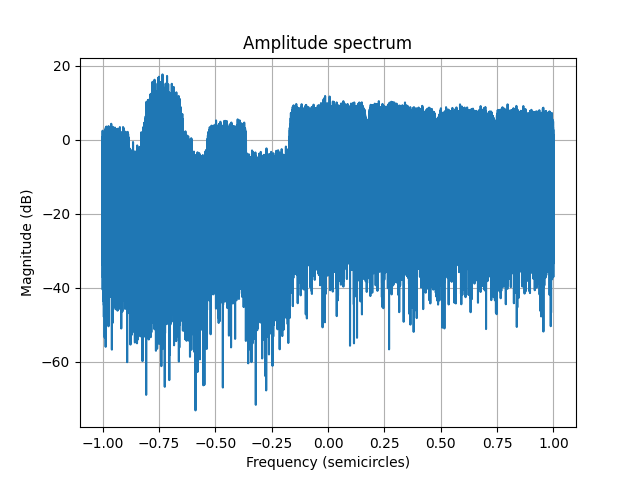

[[0.63383155]
 [1.93842623]
 [1.61154615]
 [1.12101151]
 [0.62147364]
 [0.62433363]
 [0.47853696]
 [0.85929985]
 [0.60352008]
 [0.80677525]]
1638400
[ -855876.21359125 -129949.1301526j    234843.53806623-1579265.28669264j
  -529300.17703367-2450899.26667302j   236075.61533081 +879299.05983683j
  -157840.40348218 -311823.32230904j -1940255.30668497 -990833.55013833j
   195886.08456329-1383365.95496399j  -266538.08810756 -361780.07460368j
   817415.57984911-1055198.95487601j  -819501.14729714-1366366.52977246j]


In [22]:
# first subband
left_board = -0.3804
right_board = -0.0512

subcarr_freq = (left_board + right_board) / 2
mixed_sig = add_freq(source_signal, -subcarr_freq)
ss = source_signal[-10:]#(821500 - 10 -1) : (821500 - 1)]
print(ss)
print(mixed_sig[-10:])#821500 - 10 -1) : (821500 - 1)])
plot_spectrum(mixed_sig, 2)
spect_mix_sig = calculate_spectrum(mixed_sig)
print(spect_mix_sig[:10])
spectrum = np.fft.fft(mixed_sig)
print(len(spectrum))
print(spectrum[-10:])

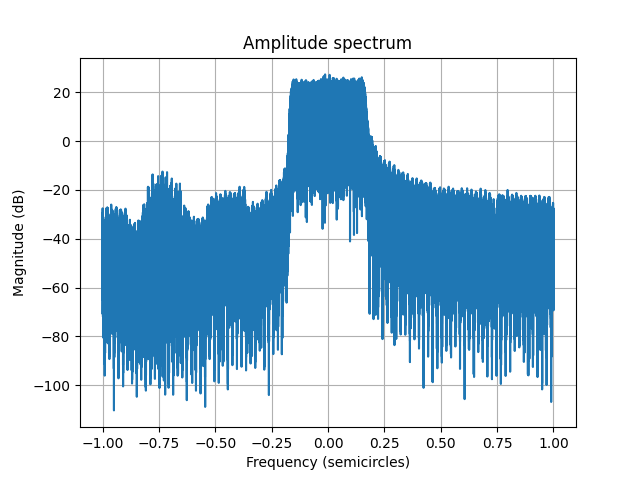

[-2207.89446462+2305.34537538j -2221.84757523+1700.09347502j
 -2120.23008793 +803.15486412j -2025.23144459 -203.08048766j
 -1963.8049959 -1134.30048097j -2042.99017543-1819.24603315j
 -2209.89179216-2087.03024092j -2491.70571892-1924.54461877j
 -2762.32757651-1449.62931725j -2963.78329382 -666.42790446j]


In [23]:
sig_rrc_filtered = np.convolve(mixed_sig, s_rrc, 'same')
plot_spectrum(sig_rrc_filtered, 5)
print(sig_rrc_filtered[(821500 - 10 -1) : (821500 - 1)])

In [27]:
re_part = np.real(mixed_sig)
print((re_part[:99]))
print((mixed_sig[:99]))

[ 314.          -12.7141752   -35.8576813   207.69075269 -261.81176288
 -507.44352247  111.65271303  336.55102782  404.85054154  188.77881768
 -259.18820595  212.9686063   -22.2910583   212.5704067   -13.44815852
  147.13205243   35.34331757   93.90215962  449.54070402   97.99538724
  355.64195044  -65.14069344  -36.62520017 -489.86765766 -307.05647932
  115.30484865  556.91205337  301.67298553 -540.74815504 -150.44667319
   94.62057956 -231.46500834 -191.09052365  141.18620567  180.01145418
  198.98873947  233.44291752 -157.71323224  493.71536627  652.39738692
  213.66386646  -52.10787811 -212.63180609 -148.11522121 -117.56436986
  278.12980781  203.70333716  -68.43073749 -229.29156444 -188.25414666
 -126.70693248  260.29847519 -318.59941745  -75.36647291 -254.54086558
 -418.26255109 -184.50415626  720.90134561   85.09035576   16.41412934
 -551.49287935  137.20448939  -73.53400938 -325.44523072 -199.91598505
  341.48124222  269.02808642  126.08605127  114.10814396 -251.08688197
 -399.

In [10]:
a = np.array([2.0432, 213.43221, 894.324, 89214.83, 4378, 138, 1884, 8378, 8743872, 847, 342, 432, 123, 4234], dtype = float)
b = np.array([321.923, 884.134, 9422, 843, 123,12], dtype = float)
print(a)
print(len(a))
print(len(b))
res = np.convolve(a, b, 'same')
print(res)

[2.0432000e+00 2.1343221e+02 8.9432400e+02 8.9214830e+04 4.3780000e+03
 1.3800000e+02 1.8840000e+03 8.3780000e+03 8.7438720e+06 8.4700000e+02
 3.4200000e+02 4.3200000e+02 1.2300000e+02 4.2340000e+03]
14
6
[4.95857169e+05 3.15236887e+07 8.88937388e+07 8.45277484e+08
 1.17298694e+08 2.03378253e+07 2.84173723e+09 7.81162243e+09
 8.23929170e+10 7.38055908e+09 1.07995468e+09 1.10861025e+08
 5.31873536e+06 4.00536770e+07]


In [11]:
res = np.convolve(a, b, 'same')
print(res)

[4.95857169e+05 3.15236887e+07 8.88937388e+07 8.45277484e+08
 1.17298694e+08 2.03378253e+07 2.84173723e+09 7.81162243e+09
 8.23929170e+10 7.38055908e+09 1.07995468e+09 1.10861025e+08
 5.31873536e+06 4.00536770e+07]


In [12]:
part_len = 821500
sig_part = mixed_sig[:part_len]
sig_part_rrc = np.convolve(sig_part, s_rrc, 'same')
print(sig_part[:10]);
print(s_rrc[:10]);
print(sig_part_rrc[part_len - 10 - 1:part_len])
print(len(sig_part))
print(len(s_rrc))
print(len(sig_part_rrc))

[ 314.         +43.j          -12.7141752 +165.66034453j
  -35.8576813 +876.81196769j  207.69075269+318.29632616j
 -261.81176288-144.00903033j -507.44352247 +93.20446073j
  111.65271303-127.72889913j  336.55102782+229.33252206j
  404.85054154+267.02254402j  188.77881768-278.6728512j ]
[ 0.0283133   0.01748404  0.00095068 -0.01684876 -0.03084766 -0.03677109
 -0.03241249 -0.01839306  0.00184384  0.02284711]
[-1951.7936527 +2198.91874647j -2244.69448494+1750.01563277j
 -2447.64303983+1025.45421748j -2559.35842294 +175.10727345j
 -2588.88747331 -655.2358786j  -2556.47885952-1344.92561058j
 -2436.86714353-1789.32988899j -2238.20885818-1940.12486307j
 -1914.65296412-1850.78065653j -1481.16134341-1474.84679498j
 -1054.0603649  -935.04526894j]
821500
99
821500


In [13]:
print(sig_part_rrc[999])

(595.4641936465549-553.9518884643711j)


In [22]:
n = 100
roll_off = 0.05
sig_board = 0.168
Fs = 1
T_symb = 1 / sig_board

rrc = rrcosfilter(n * Fs, roll_off, T_symb, Fs)[1]
print(rrc[:10])
print(len(rrc))

[ 0.03080058  0.0283133   0.01748404  0.00095068 -0.01684876 -0.03084766
 -0.03677109 -0.03241249 -0.01839306  0.00184384]
100


In [50]:
yf = np.fft.fft(rrc)

fft_kernel = (yf.reshape(len(yf), 1)) / len(rrc)
print(fft_kernel)

[[ 5.95354215e-02+0.00000000e+00j]
 [-5.95136906e-02+6.93889390e-19j]
 [ 5.95288923e-02+0.00000000e+00j]
 [-5.95293802e-02+2.77555756e-19j]
 [ 5.94966355e-02-5.55111512e-19j]
 [-5.95980890e-02+1.11022302e-18j]
 [ 5.93283774e-02-1.66533454e-18j]
 [-6.01517260e-02+2.22044605e-18j]
 [ 5.48374241e-02+1.38777878e-19j]
 [-5.84198314e-03+7.80625564e-20j]
 [-1.05891554e-03+1.38777878e-19j]
 [-4.55250375e-04-1.66533454e-18j]
 [-2.60576373e-04-1.11022302e-18j]
 [-1.72581018e-04+0.00000000e+00j]
 [-1.24791304e-04+3.33066907e-18j]
 [-9.56513176e-05-1.11022302e-18j]
 [-7.64131487e-05-2.22044605e-18j]
 [-6.29571696e-05+2.22044605e-18j]
 [-5.31251423e-05-2.22044605e-18j]
 [-4.56918511e-05+4.44089210e-18j]
 [-3.99167313e-05+2.11176968e-18j]
 [-3.53290479e-05+8.98935517e-19j]
 [-3.16169704e-05-6.20633538e-19j]
 [-2.85666917e-05+5.82076919e-19j]
 [-2.60272779e-05-2.28330858e-18j]
 [-2.38894851e-05+2.82561194e-18j]
 [-2.20725181e-05+7.90528768e-19j]
 [-2.05154849e-05+7.50033929e-19j]
 [-1.91717286e-05+3.

In [51]:
conv = np.convolve(sig_part[:100], rrc, 'same')
print(conv)

[  188.08643965 +824.11073599j   148.37278691+1051.44344363j
   106.91083918+1212.46722923j    46.5579546 +1288.91228445j
     6.13907792+1248.59060639j   -11.45751115+1117.61973608j
     4.9377041  +935.94144485j    73.13173045 +752.54428861j
   211.59302788 +610.47556779j   358.60462919 +554.38265647j
   507.51995624 +615.16185088j   622.59965496 +789.38012174j
   728.02003665+1024.04455587j   790.23212699+1286.17833096j
   805.42844502+1516.26404655j   791.29692423+1685.67202426j
   772.21905683+1757.08635063j   739.13380248+1728.56732035j
   693.56242282+1589.48761868j   639.81736171+1370.6014478j
   564.10349905+1124.29173543j   468.33343238 +879.95989709j
   368.53902374 +680.18002602j   246.61457368 +543.76495344j
   106.51055419 +477.64689196j   -54.4279314  +485.66311598j
  -211.63015094 +546.32337242j  -362.69786663 +581.33513334j
  -482.4134358  +542.84317541j  -545.90648133 +405.44981576j
  -535.52994878 +166.7435977j   -424.76571342 -169.30167356j
  -215.90869437 -552.7746

In [52]:
ss = sig_part[:100]
yf = np.fft.fft(ss)

fft_sig = (yf.reshape(len(yf), 1)) / len(ss)
print(fft_sig)

[[ -1.14056031 +29.29159497j]
 [ 10.29665673 +42.16074038j]
 [ 21.86630794 -38.54749366j]
 [ 41.92673684 -19.80731191j]
 [-63.93566981 +14.98167479j]
 [ 37.88733935  +8.90612089j]
 [ 37.31541378  -5.36122177j]
 [  6.02775337 +74.68030153j]
 [ 11.01365645 +37.1914794j ]
 [-30.05470385 +19.92032334j]
 [-33.25438619 +27.72818568j]
 [ 58.23664474 -41.45429528j]
 [ 91.66113147 +32.748531j  ]
 [-32.34032556 +24.62283477j]
 [-36.31099418 -34.83251685j]
 [ 34.21526964 +49.0971489j ]
 [ 20.50822723 -86.86358919j]
 [-20.44347381  -3.53898861j]
 [ -3.08713788 -66.5422988j ]
 [  2.40609834  +1.6326454j ]
 [ 19.45605931 -13.2872213j ]
 [  0.72141855  -0.6707939j ]
 [-12.55138274  +7.46102346j]
 [ 15.91269293  +4.87996572j]
 [-32.42663808  -9.31791408j]
 [-36.92166319  +9.66964891j]
 [ 11.36595149 -27.44295495j]
 [ -3.61178109 +13.49720177j]
 [ 21.79139798 -32.13666799j]
 [-15.69612791 +28.25547943j]
 [ -7.14581879 -20.78459513j]
 [ 43.79130623 -14.97072406j]
 [ 13.3642544   -9.08181306j]
 [  1.1634

In [53]:
mult = fft_sig * fft_kernel
print(mult)

[[-6.79037385e-02+1.74388745e+00j]
 [-6.12792043e-01-2.50914126e+00j]
 [ 1.30167709e+00-2.29468960e+00j]
 [-2.49587266e+00+1.17911700e+00j]
 [-3.80395724e+00+8.91359244e-01j]
 [-2.25801302e+00-5.30787786e-01j]
 [ 2.21386295e+00-3.18072588e-01j]
 [-3.62579769e-01-4.49214903e+00j]
 [ 6.03960549e-01+2.03948493e+00j]
 [ 1.75579073e-01-1.16374193e-01j]
 [ 3.52135862e-02-2.93618067e-02j]
 [-2.65122544e-02+1.88720835e-02j]
 [-2.38847252e-02-8.53349344e-03j]
 [ 5.58132631e-03-4.24943389e-03j]
 [ 4.53129633e-03+4.34679521e-03j]
 [-3.27273562e-03-4.69620698e-03j]
 [-1.56709822e-03+6.63752036e-03j]
 [ 1.28706325e-03+2.22804706e-04j]
 [ 1.64004639e-04+3.53506909e-03j]
 [-1.09939087e-04-7.45985904e-05j]
 [-7.76622291e-04+5.30382442e-04j]
 [-2.54870307e-05+2.36985100e-05j]
 [ 3.96836697e-04-2.35894958e-04j]
 [-4.54572993e-04-1.39404476e-04j]
 [ 8.43977120e-04+2.42519939e-04j]
 [ 8.82039524e-04-2.31002934e-04j]
 [-2.50875170e-04+6.05735120e-04j]
 [ 7.40974404e-05-2.76901639e-04j]
 [-4.17778767e-04+6.

In [67]:
yf = np.fft.irfft((mult), 64)


#conv_res = yf.reshape(len(yf), 1) / len(mult)
print(yf)

[[-0.001061   -0.001061   -0.001061   ... -0.001061   -0.001061
  -0.001061  ]
 [-0.00957488 -0.00957488 -0.00957488 ... -0.00957488 -0.00957488
  -0.00957488]
 [ 0.0203387   0.0203387   0.0203387  ...  0.0203387   0.0203387
   0.0203387 ]
 ...
 [ 0.02725519  0.02725519  0.02725519 ...  0.02725519  0.02725519
   0.02725519]
 [-0.03150177 -0.03150177 -0.03150177 ... -0.03150177 -0.03150177
  -0.03150177]
 [ 0.0050151   0.0050151   0.0050151  ...  0.0050151   0.0050151
   0.0050151 ]]
